### Load Python and OpenCV Libraries

In [1]:
import argparse
import cv2
from skimage.filters import threshold_local
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Input picture')

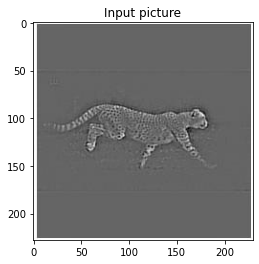

In [2]:
kernelSize = (5, 5)
image = cv2.imread('test.jpg')
plt.imshow(image)
plt.title("Input picture")

### Adaptive Thresholding

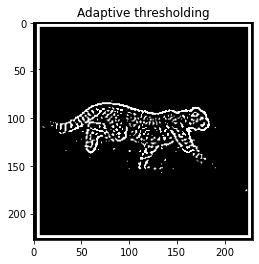

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
T = threshold_local(blurred, 5, offset=1, method="gaussian")
thresh = (blurred < T).astype("uint8") * 255
plt.imshow(thresh);
plt.title("Adaptive thresholding");

### Morphological operations

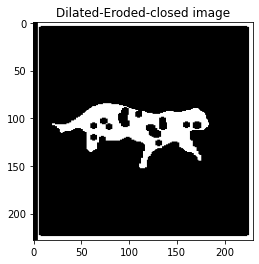

In [4]:
kernelSize = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)
dilated = cv2.dilate(thresh.copy(), None, iterations=2)
eroded = cv2.erode(dilated.copy(), None, iterations=3)
closing = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing);
plt.title("Dilated-Eroded-closed image");

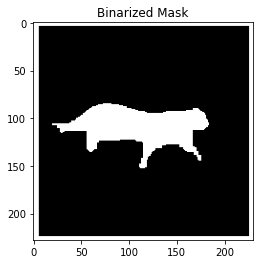

In [5]:
dilated = cv2.dilate(eroded.copy(), None, iterations=6)
eroded = cv2.erode(dilated.copy(), None, iterations=6)
plt.imshow(eroded);
plt.title("Binarized Mask");